## <span style='background-color:blue'>데이터 확인</span>

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
mask_image_df = pd.read_csv('../input/data/train/train.csv')

In [161]:
mask_image_df.tail()

,id,gender,race,age,path
2695,006954,male,Asian,19,006954_male_Asian_19
2696,006955,male,Asian,19,006955_male_Asian_19
2697,006956,male,Asian,19,006956_male_Asian_19
2698,006957,male,Asian,20,006957_male_Asian_20
2699,006959,male,Asian,19,006959_male_Asian_19


## <span style='background-color:blue'>나이 범주별 확인</span>

In [162]:
# image df 연령 max값 확인
print( 'Train Data Age MAX :', mask_image_df['age'].max())
print('Train Data Age MIN :', mask_image_df['age'].min())

Train Data Age MAX : 60
Train Data Age MIN : 18


In [178]:
# 데이터 연령 범주 레이블 추가
bins = [0, 30, 59, mask_image_df['age'].max()] 
mask_image_df['age_label'] = pd.cut(mask_image_df['age'], bins, labels=['young','middle','elder'])

In [179]:
mask_image_df.head() # 데이터 확인

,id,gender,race,age,path,age_label
0,000001,female,Asian,45,000001_female_Asian_45,middle
1,000002,female,Asian,52,000002_female_Asian_52,middle
2,000004,male,Asian,54,000004_male_Asian_54,middle
3,000005,female,Asian,58,000005_female_Asian_58,middle
4,000006,female,Asian,59,000006_female_Asian_59,middle


In [180]:
# 연령별 데이터 확인
mask_image_df.age_label.value_counts().to_frame().style.background_gradient()

,age_label
young,1298
middle,1210
elder,192


In [181]:
mask_image_df[mask_image_df.id == '006360']

,id,gender,race,age,path,age_label
2400,006360,female,Asian,18,006360_female_Asian_18,young


In [182]:
# 연령별 / 나이별 데이터 확인
mask_image_df[['age_label','gender']].value_counts().sort_index().to_frame().style.background_gradient()

In [58]:
# 연령별 / 나이별 데이터 확인
mask_image_df[['age_label','gender']].value_counts().sort_index().to_frame().style.background_gradient()

## <span style="color:yellow">문제점 / 생각해 봐야 할 점</span>
1. 마스크 안 쓴거랑 쓴거랑 데이터 양 차이 약 5배 -> 마스크 잘못 쓴거 오차값 많이 날듯 
    - 데이터를 반으로 줄이면 ?? 잘 못 쓴거 하나, 잘 쓴 마스크 2개 , 맨 얼굴 하나
    - 아니면 incorrect 랑 normal을 불리거나 -> 이게 좀더 번거롭지 않나??
    <br><br>
2. train set 에 60살 이상 없음 -> 노인 판별시 오차 많이 생길듯
    - validation set 만들기 조금 위험한듯.
    - 데이터 불리기 -> 그냥 합성
    - 60살만으로 이 이상 나이를 정확히 판별할수는 있나?? 너무 제한값에 근접하다.
    <br><br>
3. 중간 나이대 남성 여성 데이터 셋 약 2배 차이 
    - 이것도 남성만 데이터 합성 해야 할듯
    <br><br>
4. 얼굴색 --> 비율 확인 안됨
    - 밝기 조절을 하든 rgb2gray로 하든..?
    - 다 회색으로 바꿔서 하면 좀더 성능 좋아지지 않으려나??

## <span style='background-color:blue'> 이미지 블렌딩 </span>


#### - 이미지 블렌딩 OpenCV <span style="color:red">실패!</span>

In [ ]:
import cv2

In [11]:
base_dir ='../input/data/train/images/000001_female_Asian_45/'

In [ ]:
def add_image(imgfile1, imgfile2):
    img1 = cv2.imread(base_dir + imgfile1)
    img2 = cv2.imread(base_dir +imgfile2)
    add_img = cv2.add(img1, img2)
    #print(add_img)
    return
    #cv2.imshow('image',add_img)
    #cv2.waitKey(2)
    #cv2.destroyAllWindows()

In [ ]:
add_image('mask1.jpg','mask2.jpg')

#### - 이미지 블렌딩 Image

In [ ]:
from PIL import Image

In [9]:
from PIL import Image

In [13]:
img1 = Image.open(base_dir + 'mask1.jpg')
img2 = Image.open(base_dir +'mask2.jpg')

In [14]:
img3 = Image.blend(img1,img2,0.5)
#image4.save("output2.jpg")

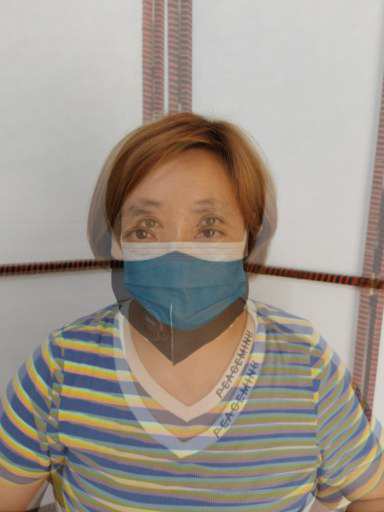

In [15]:
# image show
img3

### <span style ='background-color:purple'>내일 할 일</span>
1. 팀원분들께 조언 구하기
2. dataset 추가 만들기
3. torchvision.compose 구성하기 대략
4. model 후보군 찾아보기 3개??
5. loss function 찾아보기

# Image 생성 코드 플로우
1. 데이터 생성 위한 그룹 데이터 프레임 만들기
2. 데이터 프레임 주소별로 데이터 만들기 ==> 그룹 레이블로 폴더 따로 만들어서 생성
    - bins = [0, 28, 56, mask_image_df['age'].max()]  max =60
    - 몇개씩 train 할 것인가 =? 320 최대한 적게 생성할거임
    - middle m ==> 40개 incorrect, normal
    - elder m ==> 100개 incorrect, noraml
3. 이미지 저장!

In [137]:
len(mask_image_df)

2700

In [120]:
mask_image_df.head()

,id,gender,race,age,path,age_label
0,000001,female,Asian,45,000001_female_Asian_45,middle
1,000002,female,Asian,52,000002_female_Asian_52,middle
2,000004,male,Asian,54,000004_male_Asian_54,middle
3,000005,female,Asian,58,000005_female_Asian_58,elder
4,000006,female,Asian,59,000006_female_Asian_59,elder


In [ ]:
for a in mask_image_df:
    if a.gender=='female': gender_label

In [ ]:
mask*6  gender_label * 3 + age_label

In [117]:
# 중간연령 남성 데이터 리스트
mask1 = (mask_image_df.age_label =='middle') & (mask_image_df.gender=='male')
middle_male = mask_image_df.loc[mask1 ,:].path
middle_male.describe()
middle_male = list(middle_male)

In [84]:
# 상위연령 남성 데이터 리스트
mask2 = (mask_image_df.age_label =='elder') & (mask_image_df.gender=='male')
elder_male = mask_image_df.loc[mask2 ,:].path
elder_male.describe()
elder_male=list(elder_male)

In [89]:
from PIL import Image
import random

In [90]:
# 이미지 호출 경로, 저장 경로 선언
base_dir ='../input/data/train/images/'
save_dir ='../input/data/train/image_blend/'

In [119]:
# 함수 선언
# 올바르지 않은 마스크 착용 블렌드
def make_image_incorrect(data1_dir, data2_dir,age_gender,i) :  
    img = Image.blend( Image.open(base_dir + data1_dir +'/incorrect_mask.jpg') ,Image.open(base_dir + data2_dir + '/incorrect_mask.jpg') , 0.5 )
    img.save(save_dir + age_gender +'/incorrect/incorrect_' + str(i) +'.jpg')
    return

# 맨얼굴 이미지 블렌드
def make_image_normal(data1_dir, data2_dir, age_gender ,i) :   
    img = Image.blend( Image.open(base_dir + data1_dir + '/normal.jpg') ,Image.open(base_dir + data2_dir +'/normal.jpg') , 0.5 )
    img.save(save_dir +age_gender +'/normal/normal_'+ str(i) +'.jpg')
    return

In [113]:
# 상위연령 남성 이미지 블렌드 생성

random.shuffle(elder_male)
for i in range(100):
    make_image_incorrect(elder_male[i], elder_male[210-i],'elder_male', i )
    make_image_normal(elder_male[i], elder_male[2*i],'elder_male', i )

In [118]:
# 중위연령 남성 이미지 블렌드 생성

random.shuffle(middle_male)
for i in range(50):
    make_image_incorrect(middle_male[i], middle_male[60-i],'middle_male', i )
    make_image_normal(middle_male[i], middle_male[2*i+1], 'middle_male', i )

# Image 생성 코드 플로우 2!
1. 데이터 생성 위한 그룹 데이터 프레임 만들기
2. 데이터 프레임 주소별로 데이터 만들기 ==> 그룹 레이블로 폴더 따로 만들어서 생성
    - bins = [0, 28, 56, mask_image_df['age'].max()]  max =60
    - 몇개씩 train 할 것인가 =? 500 개 정도 최대한 적게 생성할거임
    - middle m ==> 300개 incorrect, normal
    - elder f ==> 200 개 incorrect, normal
    - elder m ==> 300개 incorrect, noraml
3. 그리고 데이터프레임 train용 validation set 으로 처음부터 나누고 갈거임

In [128]:
from PIL import Image
import random
# 이미지 호출 경로, 저장 경로 선언
base_dir ='../input/data/train/images/'
#save_dir ='../input/data/train/image_blend/'

In [127]:
# 상위연령 여성 데이터 리스트
mask3 = (mask_image_df.age_label =='elder') & (mask_image_df.gender=='female')
elder_female = mask_image_df.loc[mask3 ,:].path
elder_female = list(elder_female)
len(elder_female)

326

In [152]:
# 함수 선언
# 올바르지 않은 마스크 착용 블렌드
def make_image_incorrect(data1_dir, data2_dir,i) :  
    img = Image.blend( Image.open(base_dir + data1_dir +'/incorrect_mask.jpg') ,Image.open(base_dir + data2_dir + '/incorrect_mask.jpg') , 0.5 )
    img.save(base_dir + data1_dir + '/incorrect_' + str(i) +'.jpg')
    return

# 맨얼굴 이미지 블렌드
def make_image_normal(data1_dir, data2_dir,i) :   
    img = Image.blend( Image.open(base_dir + data1_dir + '/normal.jpg') ,Image.open(base_dir + data2_dir +'/normal.jpg') , 0.5 )
    img.save(base_dir + data1_dir + '/normal_' + str(i) +'.jpg')
    return

In [153]:
# 중위연령 남성 이미지 블렌드 생성

random.shuffle(middle_male)
for i in range(300):
    sampleList = random.sample(middle_male, 2 )
    make_image_incorrect(sampleList[0], sampleList[1], i )
    make_image_normal(sampleList[0], sampleList[1], i )

In [154]:
# 중위연령 여성 이미지 블렌드 생성

random.shuffle(elder_female)
for i in range(200):
    sampleList = random.sample(elder_female, 2 )
    make_image_incorrect(sampleList[0], sampleList[1], i )
    make_image_normal(sampleList[0], sampleList[1], i )

In [155]:
# 상위연령 남성 이미지 블렌드 생성

random.shuffle(elder_male)
for i in range(300):
    sampleList = random.sample(elder_male, 2 )
    make_image_incorrect(sampleList[0], sampleList[1], i )
    make_image_normal(sampleList[0], sampleList[1], i )

# train dataset 데이테 프레임 뽑기

In [150]:
len(mask_image_df)

2700

In [138]:
# 0.2 의 validation dataset
indList = random.sample(range(2700), 540)

In [141]:
indList[:4]

[1802, 746, 2560, 2225]

In [142]:
validation_set_df = mask_image_df.loc[indList]

In [147]:
test_set_df = mask_image_df.drop(mask_image_df.index[indList])

In [158]:
validation_set_df.to_csv('../input/data/train/val_df.csv' , index = False)


In [143]:
validation_set_df.head()

,id,gender,race,age,path,age_label
1802,004262,female,Asian,59,004262_female_Asian_59,elder
746,001484,male,Asian,57,001484_male_Asian_57,elder
2560,006582,female,Asian,20,006582_female_Asian_20,young
2225,005523,male,Asian,52,005523_male_Asian_52,middle
1113,003052,female,Asian,19,003052_female_Asian_19,young


In [144]:
validation_set_df[['age_label','gender']].value_counts().sort_index().to_frame().style.background_gradient()

In [151]:
test_set_df[['age_label','gender']].value_counts().sort_index().to_frame().style.background_gradient()